In [1]:
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import seaborn as sns
from IPython.display import Image
%matplotlib inline

7.1. Построить график функции $y_{1-\alpha - \beta} − y_\beta$ для $\beta \in (0, \alpha)$, где $y_t$ – квантиль распределения а) N(0, 1), б)Gamma(n, 1), n = 1, 2, 5, 10, 100. 
Рассмотреть $\alpha$ = 0.001, 0.05, 0.1.

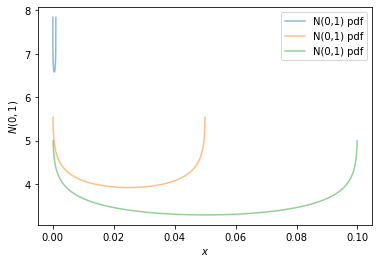

In [10]:
X = sts.norm()
for alp in alpha:
    x = np.linspace(0, alp, 1000)
    y = X.ppf(1-alp+x) - X.ppf(x)
    plt.plot(x, y, label='N(0,1) pdf', alpha=0.5)
    plt.ylabel('$N(0,1)$')
    plt.xlabel('$x$')
    plt.legend(loc = 'best')
plt.show()

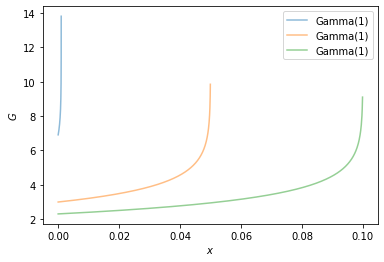

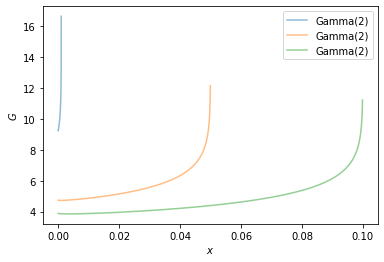

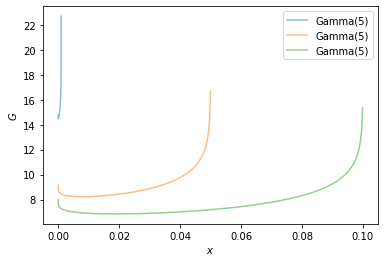

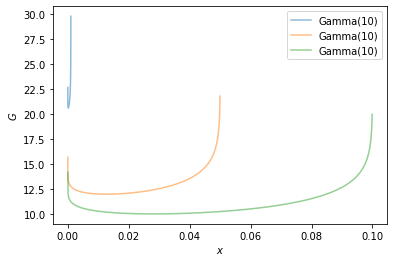

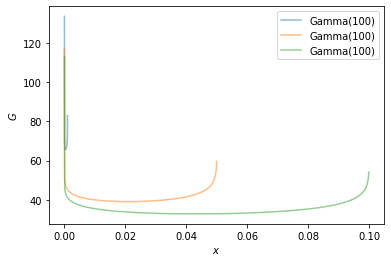

In [9]:
for  n in [1, 2, 5, 10, 100]:
    X = sts.gamma(n)
    for alp in alpha:
        x = np.linspace(0, alp, 1000)
        y = X.ppf(1-alp+x) - X.ppf(x)
        plt.plot(x, y, label='Gamma({})'.format(n), alpha=0.5)
        plt.ylabel('$G$')
        plt.xlabel('$x$')
        plt.legend(loc = 'best')
    plt.show()

7.2. $X_1, ..., X_n \sim R[0, \theta]$. Построить асимптотический доверительный интервал, используя $\overline{X}$. Найти эм-
пирически доверительную вероятность этого интервала (построить 1000 выборок, подсчитать долю тех, для которых интервал накрыл истинное значение параметра).

In [36]:
teta = 10
alp = 0.2
n = 100
X = sts.norm()
x = sts.uniform(scale = teta).rvs(n)
print(2*np.mean(x) - 2*X.ppf(1-alp/2)*np.mean(x)**2/(3*n**0.5) ,2*np.mean(x) - 2*X.ppf(alp/2)*np.mean(x)**2/(3*n**0.5) )

7.755263849057462 11.867453501342753


In [41]:
P = 0
teta = 10
alp = 0.2
n = 100
X = sts.norm()
for i in range(n):
    x = sts.uniform(scale = teta).rvs(n)
    if(2*np.mean(x) - 2*X.ppf(1-alp/2)*np.mean(x)**2/(3*n**0.5) < teta < 2*np.mean(x) - 2*X.ppf(alp/2)*np.mean(x)**2/(3*n**0.5) ):
        P+=1
print(P/n)

1.0


7.3. $X_1, ..., X_n \sim Bern(\theta)$. Построить 2 асимптотических доверительных интервала с помощью $\overline{X}$, срав-
нить их средние длины (генерировать 1000 выборок, по каждой строить оба интервала, посчитать и показать средние длины) для $\theta$ = 0.1, 0.4, 0.5, 0.9 и n = 20, 50, 100.

Будем строить  интервалы с помощью метода подставновки оценки и метода стабилизации дисперсии.

Вывод формул:

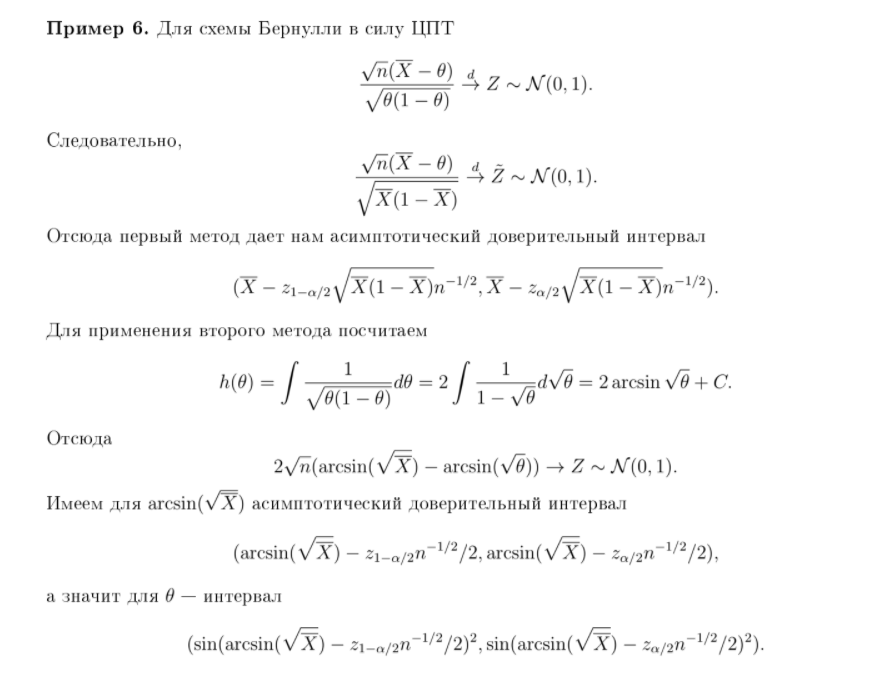

In [44]:
display(Image(filename='Screenshot_6.png', width = 800))

In [45]:
teta = 0.1
alp = 0.05
sample_1 = np.zeros(1000)
sample_2 = np.zeros(1000)
for n in [20,50,100]:
    print('\n n = {}\n'.format(n))
    for i in range(1000):
        X = sts.norm()
        x = sts.bernoulli(teta).rvs(n)
        sample_1[i] = -X.ppf(alp/2)*(np.mean(x)*(1-np.mean(x)))/(n**0.5)  + X.ppf(1-alp/2)*(np.mean(x)*(1-np.mean(x)))/(n**0.5)
        sample_2[i] = (np.sin(np.arcsin(np.mean(x)**0.5) - X.ppf(alp/2)/(2*n**0.5)))**2 - (np.sin(np.arcsin(np.mean(x)**0.5) - X.ppf(1-alp/2)/(2*n**0.5)))**2
    print('Средняя длина для первого : ', np.mean(sample_1),'\nСредняя длина для второго : ',np.mean(sample_2))


 n = 20

Средняя длина для первого :  0.07537217326418025 
Средняя длина для второго :  0.22722476108441333

 n = 50

Средняя длина для первого :  0.0482729150313004 
Средняя длина для второго :  0.15773323111653423

 n = 100

Средняя длина для первого :  0.03455600741358663 
Средняя длина для второго :  0.11448387063655


In [21]:
teta = 0.4
alp = 0.05
sample_1 = np.zeros(1000)
sample_2 = np.zeros(1000)
for n in [20,50,100]:
    print('\n n = {}\n'.format(n))
    for i in range(1000):
        X = sts.norm()
        x = sts.bernoulli(teta).rvs(n)
        sample_1[i] = -X.ppf(alp/2)*(np.mean(x)*(1-np.mean(x)))/(n**0.5)  + X.ppf(1-alp/2)*(np.mean(x)*(1-np.mean(x)))/(n**0.5)
        sample_2[i] = (np.sin(np.arcsin(np.mean(x)**0.5) - X.ppf(alp/2)/(2*n**0.5)))**2 - (np.sin(np.arcsin(np.mean(x)**0.5) - X.ppf(1-alp/2)/(2*n**0.5)))**2
    print('Средняя длина для первого : ', np.mean(sample_1),'\nСредняя длина для второго : ',np.mean(sample_2))


 n = 20

Средняя длина для первого :  0.20085733147947513 
Средняя длина для второго :  0.40551727388141684

 n = 50

Средняя длина для первого :  0.13067188234416346 
Средняя длина для второго :  0.26558485146922406

 n = 100

Средняя длина для первого :  0.09336551075530476 
Средняя длина для второго :  0.19003997790124896


In [22]:
teta = 0.5
alp = 0.05
sample_1 = np.zeros(1000)
sample_2 = np.zeros(1000)
for n in [20,50,100]:
    print('\n n = {}\n'.format(n))
    for i in range(1000):
        X = sts.norm()
        x = sts.bernoulli(teta).rvs(n)
        sample_1[i] = -X.ppf(alp/2)*(np.mean(x)*(1-np.mean(x)))/(n**0.5)  + X.ppf(1-alp/2)*(np.mean(x)*(1-np.mean(x)))/(n**0.5)
        sample_2[i] = (np.sin(np.arcsin(np.mean(x)**0.5) - X.ppf(alp/2)/(2*n**0.5)))**2 - (np.sin(np.arcsin(np.mean(x)**0.5) - X.ppf(1-alp/2)/(2*n**0.5)))**2
    print('Средняя длина для первого : ', np.mean(sample_1),'\nСредняя длина для второго : ',np.mean(sample_2))


 n = 20

Средняя длина для первого :  0.20810179027734058 
Средняя длина для второго :  0.41327009513495844

 n = 50

Средняя длина для первого :  0.1356065869372959 
Средняя длина для второго :  0.27064961264042975

 n = 100

Средняя длина для первого :  0.09703628810267015 
Средняя длина для второго :  0.19378093042100322


In [23]:
teta = 0.9
alp = 0.05
sample_1 = np.zeros(1000)
sample_2 = np.zeros(1000)
for n in [20,50,100]:
    print('\n n = {}\n'.format(n))
    for i in range(1000):
        X = sts.norm()
        x = sts.bernoulli(teta).rvs(n)
        sample_1[i] = -X.ppf(alp/2)*(np.mean(x)*(1-np.mean(x)))/(n**0.5)  + X.ppf(1-alp/2)*(np.mean(x)*(1-np.mean(x)))/(n**0.5)
        sample_2[i] = (np.sin(np.arcsin(np.mean(x)**0.5) - X.ppf(alp/2)/(2*n**0.5)))**2 - (np.sin(np.arcsin(np.mean(x)**0.5) - X.ppf(1-alp/2)/(2*n**0.5)))**2
    print('Средняя длина для первого : ', np.mean(sample_1),'\nСредняя длина для второго : ',np.mean(sample_2))


 n = 20

Средняя длина для первого :  0.07524507749579665 
Средняя длина для второго :  0.22717572999263608

 n = 50

Средняя длина для первого :  0.04778662909741259 
Средняя длина для второго :  0.15729389498209584

 n = 100

Средняя длина для первого :  0.03495239052982001 
Средняя длина для второго :  0.11507111751207189


7.4. $X_1, ..., X_n \sim exp(\theta)$. Сравнить доверительные интервалы для $\theta$: построенные с помощью 1) достаточной статистики, 2) $X_{(1)}$. Для этого моделировать 1000 выборок, для каждой найти длины двух доверительных интервалов и 1) построить гистограммы, сравнить, 2) сравнить средние длины интервалов.

0.24807504368150543 68.60404829474608


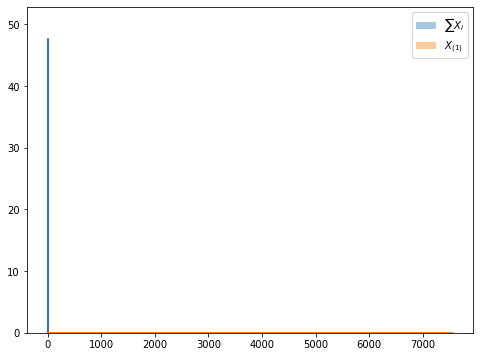

In [54]:
a=0.05
p=2
n=1000
def d1(x,n):
    l=(sts.gamma.ppf(1-a/2,n)-sts.gamma.ppf(a/2,n))/(n*x)
    return(l)
def d2(x,n):
    l=(sts.expon.ppf(1-a/2)-sts.expon.ppf(a/2))/(n*x)
    return(l)
l_1 = np.zeros(n)
l_2 = np.zeros(n)
for i in range(n):
    x=sts.expon.rvs(scale=1/p,size=n)
    l_1[i] = (d1(x.mean(),n))
    l_2[i] = (d2(min(x),n))
print(np.mean(l_1),np.mean(l_2))

plt.figure(figsize = (8,6))
sns.distplot(l_1, label = '$\sum{X_i}$') 
sns.distplot(l_2, label = '$X_{(1)}$') 
plt.legend()
plt.show()

7.5. $X_1, ..., X_n ∼ R[\theta_1, \theta_2]$. Построить доверительное множество для $(theta_1, \theta_2)$ с помощью $X_{(1)}, X_{(n)}$.

20


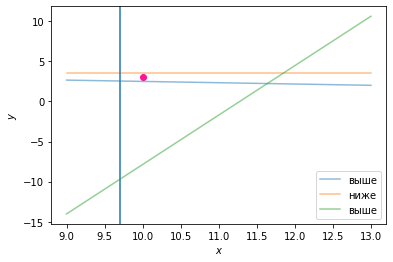

In [51]:
n = 20
teta_1, teta_2 = 3,10
alp = 0.1
n = max(round(np.log2(1/alp)+1),n)
print(n)
def L(x):
    return (alp - 2*(1-x)**n - (1-2*x)**n)**2
b = optimize.differential_evolution(L, [(0, 0.5)])['x']
fig, ax = plt.subplots()
X = sts.uniform(loc = teta_1,scale = teta_2-teta_1).rvs(n)
x = np.linspace(9,13,100)
y1 =(np.min(X)-b*x)/(1-b)
plt.plot(x, y1, label='выше'.format(n), alpha=0.5)
y = x
y = y-x + np.min(X)
plt.plot(x, y, label='ниже'.format(n), alpha=0.5)
plt.axvline(x=np.max(X))
y = ((1-b)*x-np.max(X))/(b)
plt.plot(x, y, label='выше'.format(n), alpha=0.5)
ax.scatter(teta_2, teta_1,
           c = 'deeppink')    


plt.ylabel('$y$')
plt.xlabel('$x$')
plt.legend(loc = 'best')
plt.show()